# HOUSE PRICE PRIDICTION


In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')


# Load dataset



In [2]:
df = pd.read_csv("House Price India.csv")
df = df.drop(columns=["id", "Date", "Postal Code"])


# Exploring the dataset



In [3]:
# Returns number of rows and columns of the dataset
df.shape

(14620, 20)

In [4]:
# Returns an object with all of the column headers 
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Lattitude', 'Longitude',
       'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools nearby                   int64
Distance from the airport                  int64
Price                                      int64
dtype: object

In [6]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51,805000


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of bedrooms,14620.0,3.379343,0.938719,1.0000,3.0000,3.0000,4.0000,3.300000e+01
number of bathrooms,14620.0,2.129583,0.769934,0.5000,1.7500,2.2500,2.5000,8.000000e+00
living area,14620.0,2098.262996,928.275721,370.0000,1440.0000,1930.0000,2570.0000,1.354000e+04
lot area,14620.0,15093.281122,37919.621304,520.0000,5010.7500,7620.0000,10800.0000,1.074218e+06
number of floors,14620.0,1.502360,0.540239,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront present,14620.0,0.007661,0.087193,0.0000,0.0000,0.0000,0.0000,1.000000e+00
number of views,14620.0,0.233105,0.766259,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition of the house,14620.0,3.430506,0.664151,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade of the house,14620.0,7.682421,1.175033,4.0000,7.0000,7.0000,8.0000,1.300000e+01
Area of the house(excluding basement),14620.0,1801.783926,833.809963,370.0000,1200.0000,1580.0000,2240.0000,9.410000e+03


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
waterfront present                       False
number of views                          False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from the airport                False
Price                                    False
dtype: bool

In [10]:
# Define features and target
X = df.drop(columns=["Price"])
y = df["Price"]

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 🔍 Function to compare multiple regression models
def find_best_regression_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'max_depth': [5, 10, None]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_estimators': [50, 100],
                'max_depth': [10, None]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'parameters': {
                'n_estimators': [50, 100],
                'learning_rate': [0.05, 0.1]
            }
        }
    }  # ✅ This is the correct closing brace for the models dictionary

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for model_name, mp in models.items():
        grid = GridSearchCV(mp['model'], mp['parameters'], cv=cv, scoring='r2', n_jobs=-1)
        grid.fit(X, y)
        scores.append({
            'Model': model_name,
            'Best Score (R²)': round(grid.best_score_, 4),
            'Best Parameters': grid.best_params_
        })

    return pd.DataFrame(scores, columns=['Model', 'Best Score (R²)', 'Best Parameters']).sort_values(by='Best Score (R²)', ascending=False)


In [14]:
# 📊 Run model comparison
results_df = find_best_regression_model(X_train_scaled, y_train)
results_df
print("\nBest Model Results:")
print(results_df)


Best Model Results:
               Model  Best Score (R²)  \
2      random_forest           0.8657   
3  gradient_boosting           0.8643   
1      decision_tree           0.7505   
0  linear_regression           0.6916   

                               Best Parameters  
2     {'max_depth': None, 'n_estimators': 100}  
3  {'learning_rate': 0.1, 'n_estimators': 100}  
1                            {'max_depth': 10}  
0                                           {}  


In [15]:
#  Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [16]:
#  Predict
y_pred = model.predict(X_test_scaled)

# evaluation 


In [17]:
# 📈 Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Final Model Evaluation:")
print(f"🔹 MAE: ₹{mae:,.2f}")
print(f"🔹 MSE: ₹{mse:,.2f}")
print(f"🔹 RMSE: ₹{rmse:,.2f}")
print(f"🔹 R² Score: {r2:.4f}")



📊 Final Model Evaluation:
🔹 MAE: ₹69,296.98
🔹 MSE: ₹17,490,933,129.88
🔹 RMSE: ₹132,253.29
🔹 R² Score: 0.8759


# Visualizations 


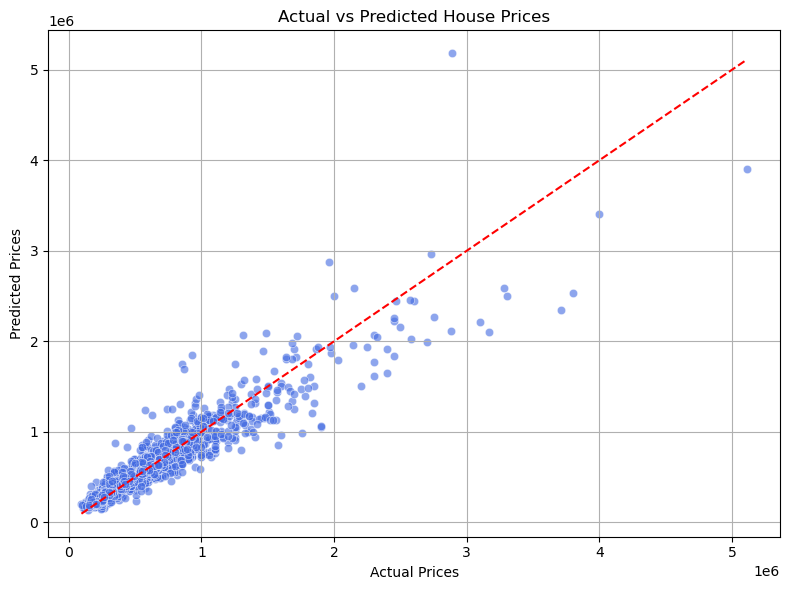

In [18]:
# 📉 Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


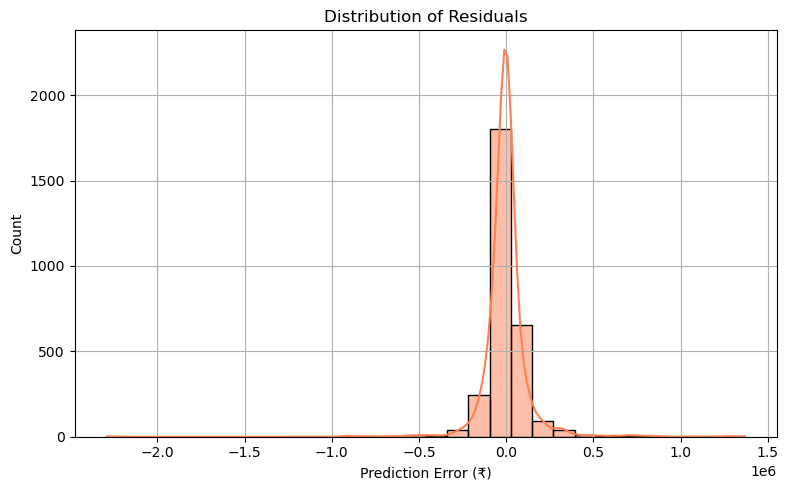

In [19]:
# 📊 Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30, color='coral')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# 💾 Save model and scaler
joblib.dump(model, "house_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
